In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import os
import seaborn as sns
if os.name == 'nt':
    font_family = "Malgun Gothic"
else:
    font_family = "AppleGothic"
    
sns.set(font=font_family, rc={"axes.unicode_minus" : False })

In [96]:
df=pd.read_csv('ftour.csv',encoding='euc-kr')
display(df.head())
display(df.info())

C:\Users\hmh\AppData\Local\Temp\ipykernel_22608\3881790843.py:1: DtypeWarning: Columns (2,73,76) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('ftour.csv',encoding='euc-kr')


,id,gender,age,edu,job,nat,other,count,month,info1,...,accom,shop1,shop2,shop3,prd1,prd2,prd3,expense,card,cash
0,584,2,0,1,8,일본,,1,3,3,...,1,7,11,,5,19,,480.975000,0.000,480.975000
1,840,1,3,2,2,싱가포르,1,18,11,3,...,1,7,,,5,,,646.888000,323.444,323.444000
2,524,1,1,3,8,프랑스,,1,6,3,...,3,6,7,8,9,10,11,560.650000,0.000,560.650000
3,282,1,1,2,8,미국,,2,2,2,...,4,4,6,7,9,12,16,509.225468,0.000,509.225468
4,562,1,2,3,6,미국,1,1,8,3,...,2,12,,,21,,,409.000000,0.000,409.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13501 entries, 0 to 13500
Data columns (total 82 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          13501 non-null  int64  
 1   gender      13501 non-null  int64  
 2   age         13501 non-null  object 
 3   edu         13501 non-null  object 
 4   job         13501 non-null  object 
 5   nat         13501 non-null  object 
 6   other       13501 non-null  object 
 7   count       13501 non-null  object 
 8   month       13501 non-null  int64  
 9   info1       13501 non-null  int64  
 10  info2       13501 non-null  object 
 11  info3       13501 non-null  object 
 12  decision    13501 non-null  int64  
 13  object      13501 non-null  int64  
 14  mov1        13501 non-null  object 
 15  mov2        13501 non-null  object 
 16  mov3        13501 non-null  object 
 17  member      13501 non-null  object 
 18  number      13501 non-null  int64  
 19  tourtype    13501 non-nul

None

## 분석: 거주 국가와
### 체류기간(period)와 지출경비(expense), 전반적만족도(overall)의 관계

In [3]:
# df의 기술 통계확인
df.describe()

,id,gender,month,info1,decision,object,number,period,overal,sat1,...,sat10,bf_img,af_img,revisit,recom,bestspot1,act1,expense,card,cash
count,13501.000000,13501.000000,13501.000000,13501.000000,13501.000000,13501.000000,13501.000000,13501.000000,13501.000000,13501.000000,...,13501.000000,13501.000000,13501.000000,13501.000000,13501.000000,13501.000000,13501.000000,1.350100e+04,1.350100e+04,1.350100e+04
mean,689.991482,1.521369,6.469299,2.962151,3.329235,3.170876,3.006666,14.616399,4.406118,4.325457,...,4.488408,4.046367,4.375972,4.236797,4.324272,34.753574,8.633138,4.767706e+03,1.946917e+03,2.820790e+03
std,621.187845,0.499562,3.451768,1.778965,3.517612,2.345536,5.888013,34.456984,0.590684,0.724080,...,0.619285,0.679377,0.623108,0.774977,0.661219,43.853797,7.579661,1.297740e+05,5.459449e+04,8.014748e+04
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.013000e-01,0.000000e+00,0.000000e+00
25%,290.000000,1.000000,3.000000,2.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,1.000000,6.018940e+02,0.000000e+00,2.090240e+02
50%,588.000000,2.000000,6.000000,3.000000,2.000000,1.000000,2.000000,5.000000,4.000000,4.000000,...,5.000000,4.000000,4.000000,4.000000,4.000000,12.000000,6.000000,1.017800e+03,3.000000e+02,5.000000e+02
75%,890.000000,2.000000,9.000000,3.000000,4.000000,6.000000,3.000000,8.000000,5.000000,5.000000,...,5.000000,4.000000,5.000000,5.000000,5.000000,48.000000,16.000000,1.792000e+03,8.982000e+02,9.420300e+02
max,7007.000000,2.000000,12.000000,9.000000,72.000000,8.000000,301.000000,365.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,136.000000,23.000000,1.355000e+07,5.550000e+06,8.000000e+06


In [5]:
#'period'만 기술 통계 확인
df['period'].describe()

count    13501.000000
mean        14.616399
std         34.456984
min          1.000000
25%          4.000000
50%          5.000000
75%          8.000000
max        365.000000
Name: period, dtype: float64

In [6]:
df.head()

,id,gender,age,edu,job,nat,other,count,month,info1,...,accom,shop1,shop2,shop3,prd1,prd2,prd3,expense,card,cash
0,584,2,0,1,8,일본,,1,3,3,...,1,7,11,,5,19,,480.975000,0.000,480.975000
1,840,1,3,2,2,싱가포르,1,18,11,3,...,1,7,,,5,,,646.888000,323.444,323.444000
2,524,1,1,3,8,프랑스,,1,6,3,...,3,6,7,8,9,10,11,560.650000,0.000,560.650000
3,282,1,1,2,8,미국,,2,2,2,...,4,4,6,7,9,12,16,509.225468,0.000,509.225468
4,562,1,2,3,6,미국,1,1,8,3,...,2,12,,,21,,,409.000000,0.000,409.000000


In [12]:
df.shape

(13501, 82)

In [14]:
df.index

RangeIndex(start=0, stop=13501, step=1)

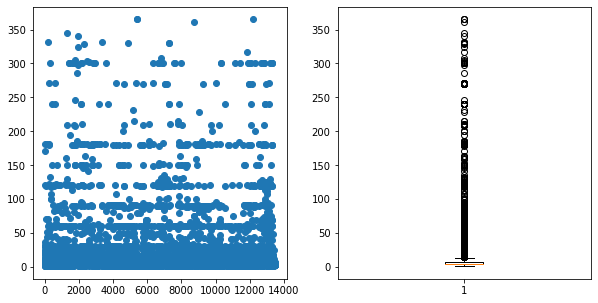

In [19]:
#체류기간(period 차트화: scatter, boxplot

#차트 전체 크기

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.scatter(df.index,df['period'])
plt.subplot(122)
plt.boxplot(df['period'])
plt.show()

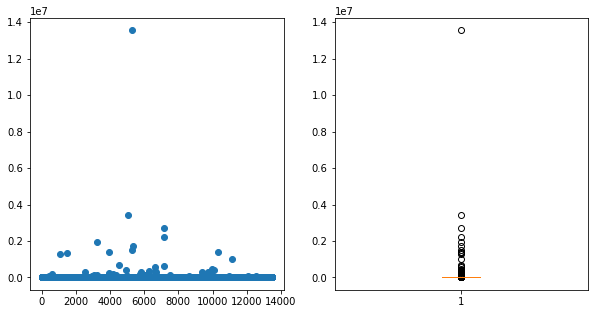

In [20]:
#지출경비(expense차트화):scatter, boxpolt

#차트 전체 크기
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.scatter(df.index,df['expense'])
plt.subplot(122)
plt.boxplot(df['expense'])
plt.show()

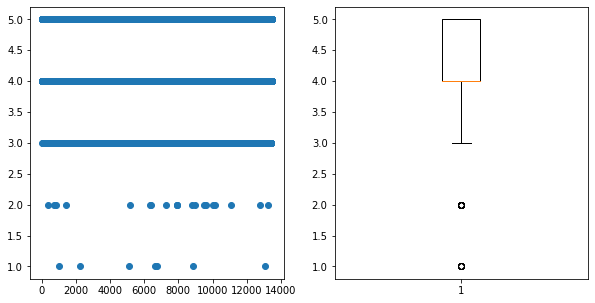

In [23]:
#전반적인 만족도(overa차트화):scatter, boxplot

#차트 전체 크기

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.scatter(df.index,df['overal'])
plt.subplot(122)
plt.boxplot(df['overal'])
plt.show()

### 순수 여행으로 생각하여 30일 이상의 자료는 삭제하고자 함

In [97]:
#체류기간(period) 30일 이하 boxplot 그리기
df_30=df[df['period']<=30]

<AxesSubplot:>

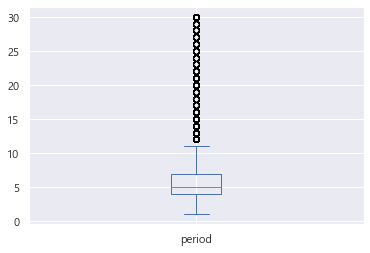

In [66]:
df_30['period'].plot(kind='box')

In [98]:
# 국가별 체류기간 합을 차트화 함
df_30.groupby('nat').sum()['period']

nat
대만        4822
독일        2443
러시아       3438
말레이시아     3578
미국        7018
베트남       2826
싱가포르      3523
영국        2713
인도        1920
인도네시아     2746
일본        5652
중국       16459
중동        3156
캐나다       3453
태국        3721
프랑스       2473
필리핀       3175
호주        3387
홍콩        4321
Name: period, dtype: int64

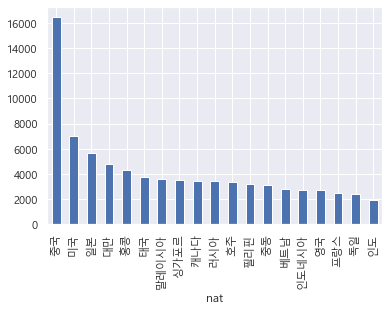

In [68]:
df_30.groupby('nat').sum()['period'].sort_values(ascending=False).plot(kind='bar')
plt.show()

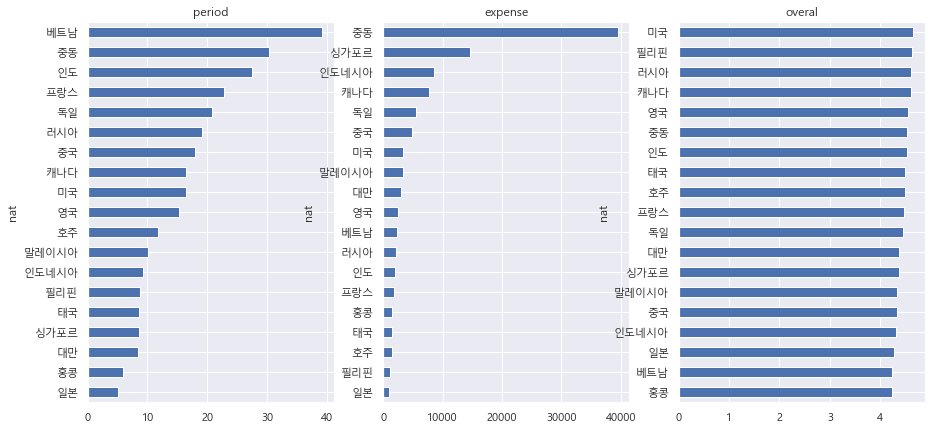

In [99]:
#국가별 체류기간(period), expense, overal 평균
ls=['period','expense','overal']
df_g=df.groupby('nat').mean()
plt.figure(figsize=(15,7))
for idx,i in enumerate(ls):
    plt.subplot(1,3,idx+1)
    df_g[i].sort_values().plot(kind='barh')
    plt.title(i)


In [100]:
# 각 나라별 'period','expense','overal' 산점도(scatter)차트 그리기
# 나라명 중복제거 (tmp2['nat'].unique())
# 각 나라별 필터링한 후
# 'period','expense','overal' 산점도(scatter)차트 작성함

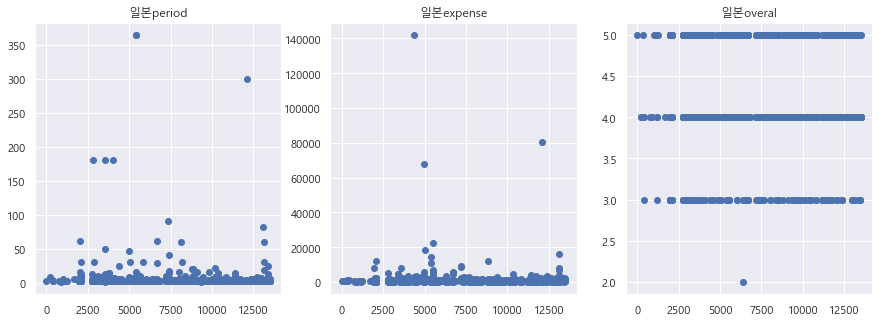

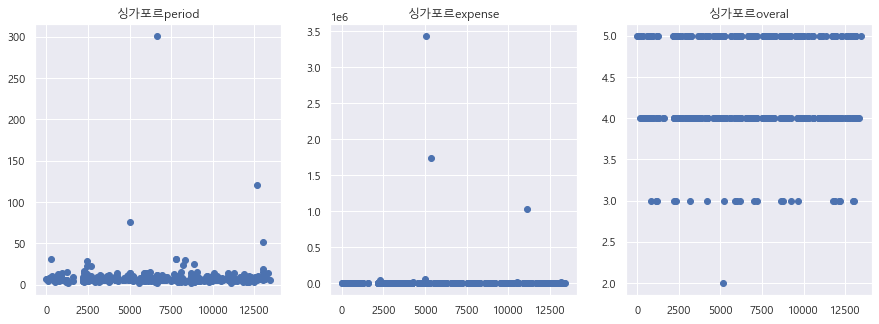

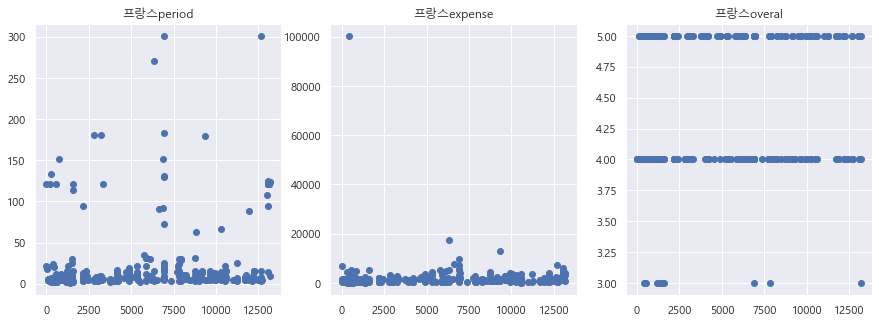

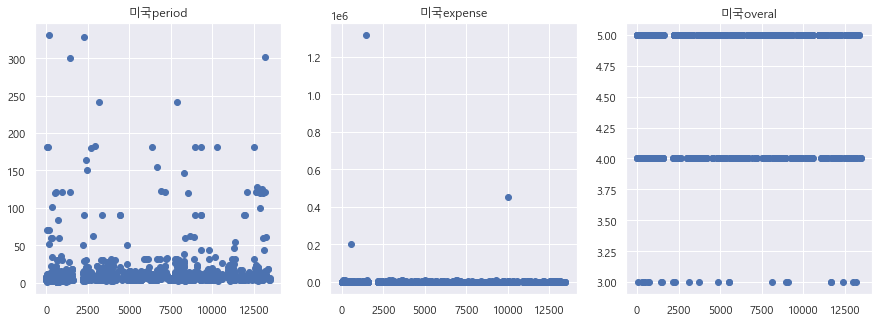

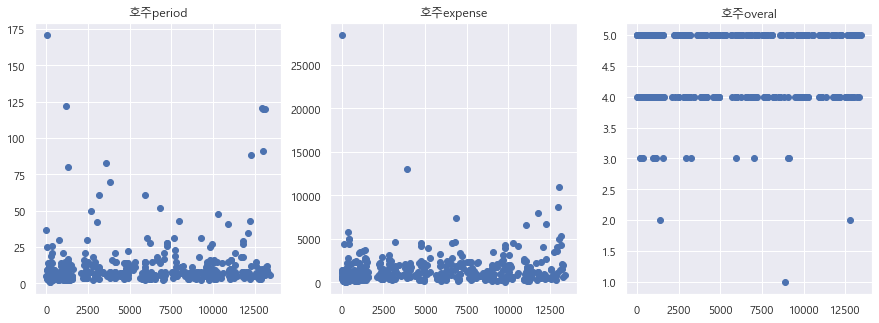

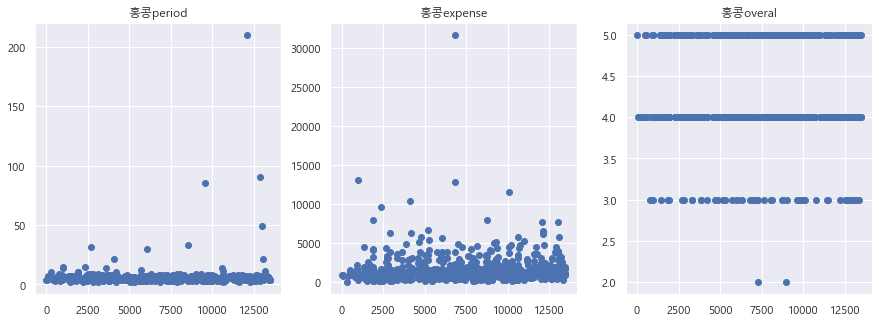

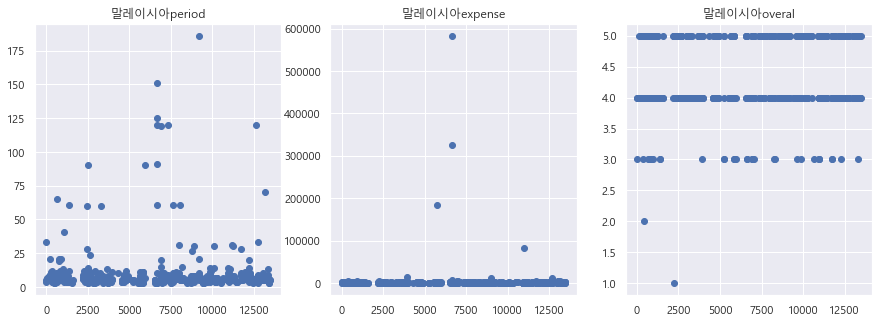

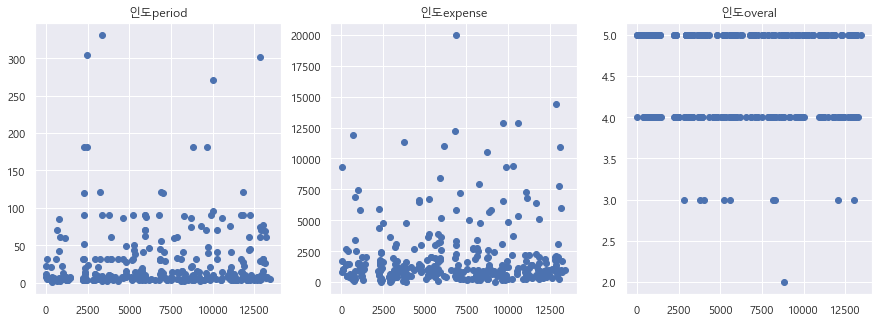

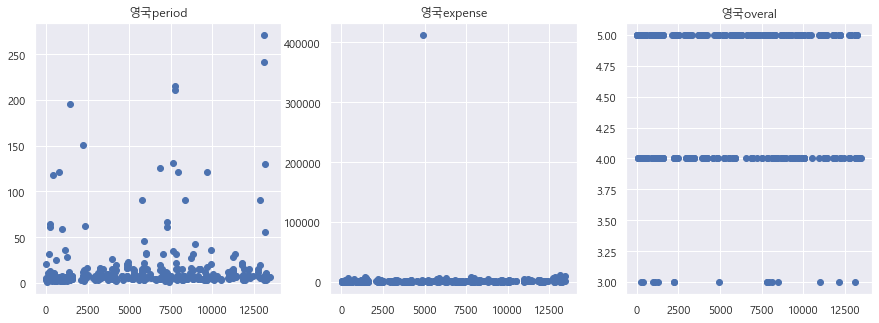

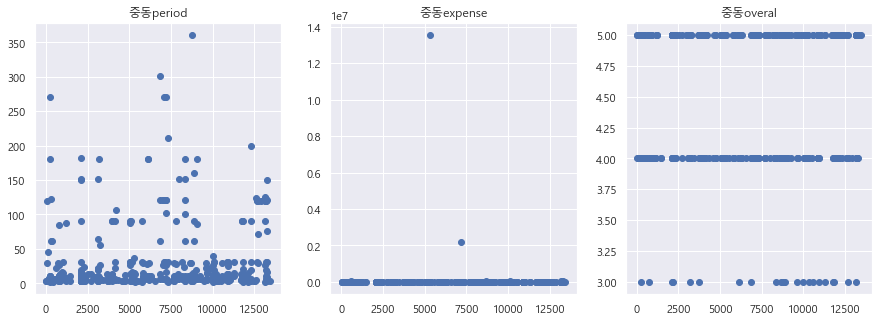

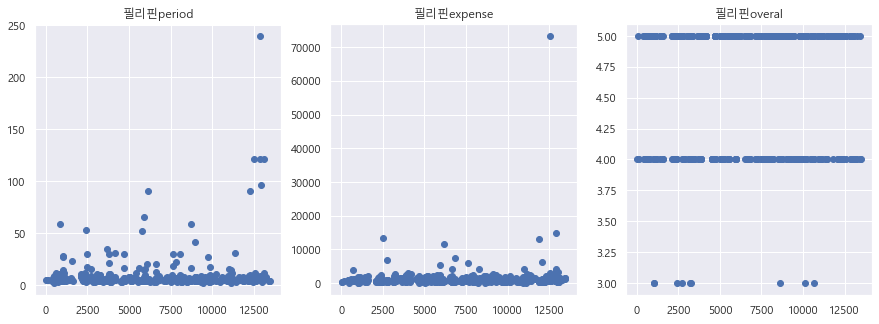

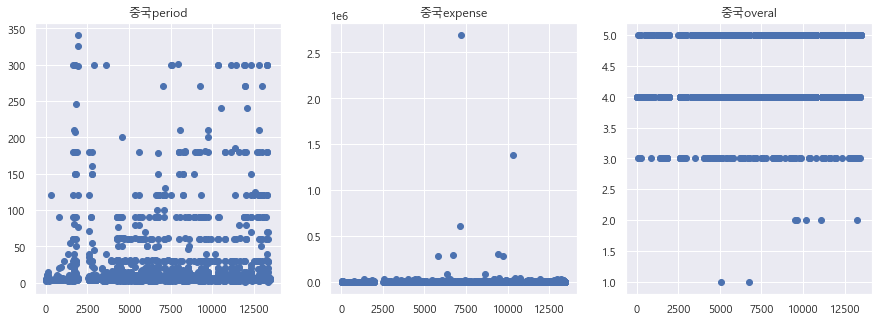

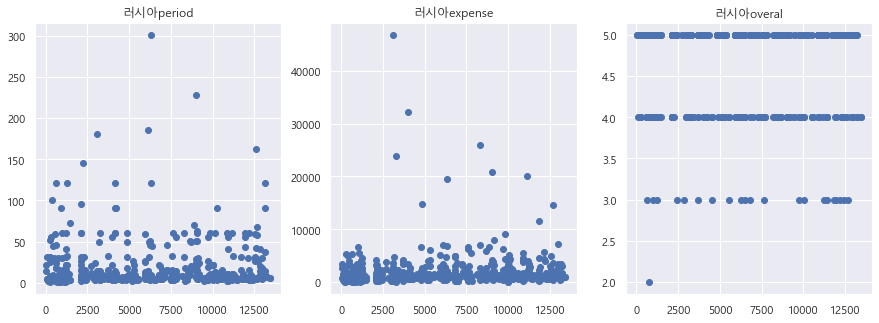

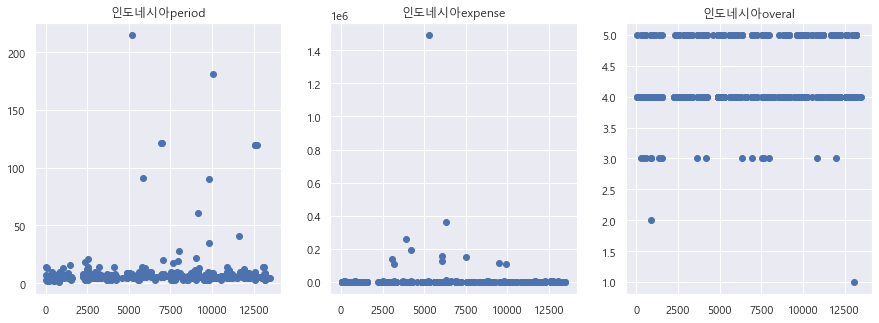

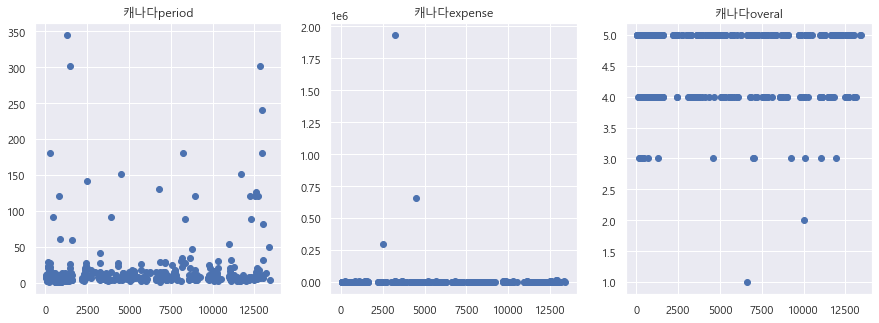

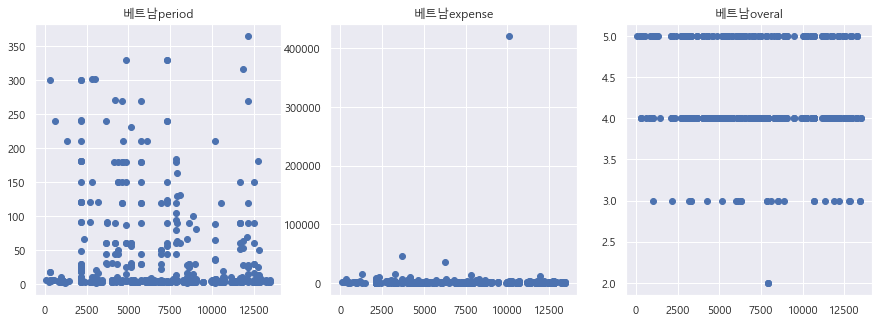

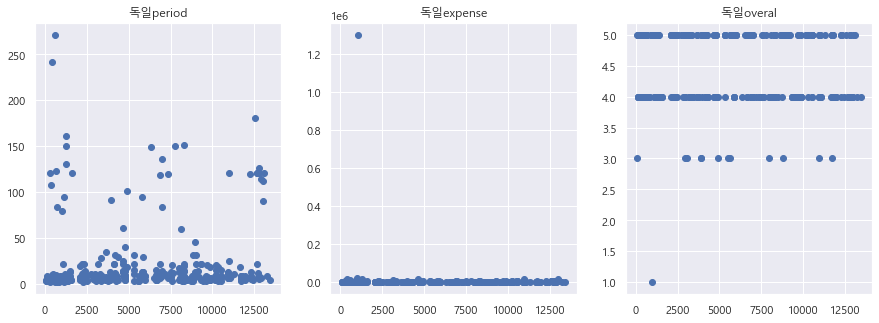

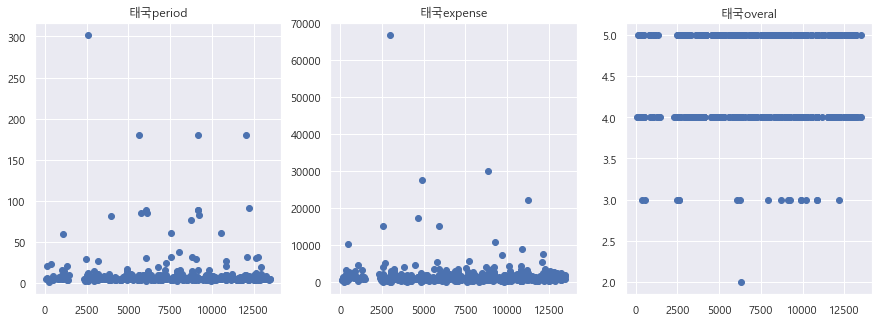

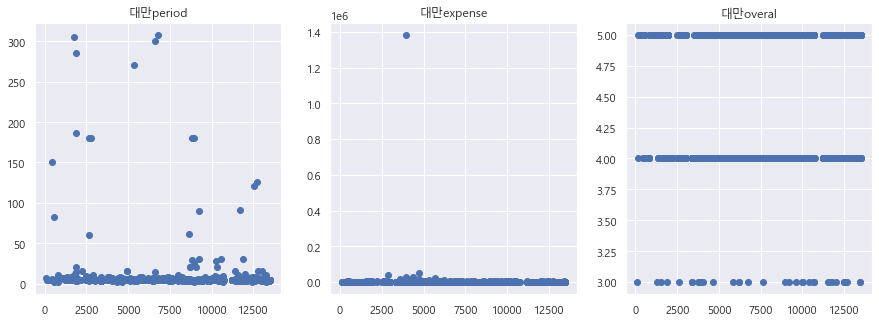

In [94]:
nats=df['nat'].unique()
ls=['period','expense','overal']
for nat in nats:
    temp=df[df['nat']==nat]
    plt.figure(figsize=(15,5))
    for idx,i in enumerate(ls):
        plt.subplot(1,3,idx+1)
        plt.scatter(temp.index,temp[i])
        plt.title(nat+i)
    plt.savefig(f'{nat}.png')
